<a href="https://colab.research.google.com/github/thebackbencher666/Best-websites-a-programmer-should-visit/blob/master/game_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
file_path = "game_dataset.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing values in each column:")
print(df.isnull().sum())




Dataset Shape: (2000, 8)

First 5 rows of the dataset:
  Game_ID       Game_Name      Genre     Platform  Release_Year  Global_Sales  \
0   G0001  Warrior Galaxy  Adventure       Switch          2002         28.62   
1   G0002    Legend Quest     Action       Mobile          2019         24.17   
2   G0003   Empire Battle  Adventure  PlayStation          2016         37.46   
3   G0004     Shadow Rise   Strategy  PlayStation          2019         17.05   
4   G0005     Quest Arena  Adventure       Switch          2020         31.26   

   User_Rating  Active_Players  
0          4.8            95.7  
1          5.4            50.9  
2          9.6            50.5  
3          8.9            82.2  
4          1.3            41.8  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Game_ID         2000 non-null   object 
 1  

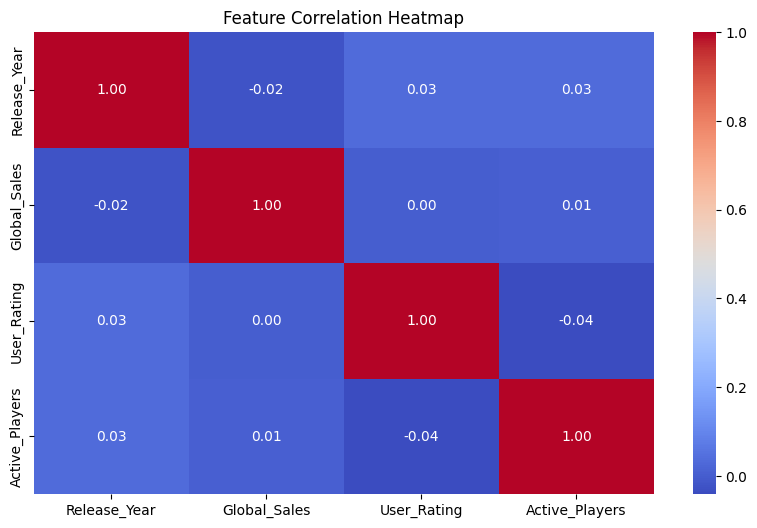

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['number'])
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Fill missing values (Modify this based on dataset needs)
df.fillna(0, inplace=True)

# Encode categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future reference

# Define features and target variable (Modify as per dataset)
X = df.drop(columns=["Global_Sales"])  # Example target
y = df["Global_Sales"]

# Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1600, 7)
Testing set shape: (400, 7)


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a pipeline with a scaler and regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Model Evaluation:
Mean Squared Error: 217.0679950383388
R² Score: -0.008493400939225682


In [9]:
# Show predictions vs actual values
predictions_df = pd.DataFrame({
    "Actual Sales": y_test.values,
    "Predicted Sales": y_pred
})

# Show first 10 predictions
print(predictions_df.head(10))


   Actual Sales  Predicted Sales
0         49.36        23.765898
1         39.01        25.476576
2          0.43        24.098668
3          2.32        24.284089
4         38.13        25.260147
5         18.74        22.667831
6         34.17        23.596464
7         30.03        22.905837
8         43.11        25.879711
9         25.32        23.617976


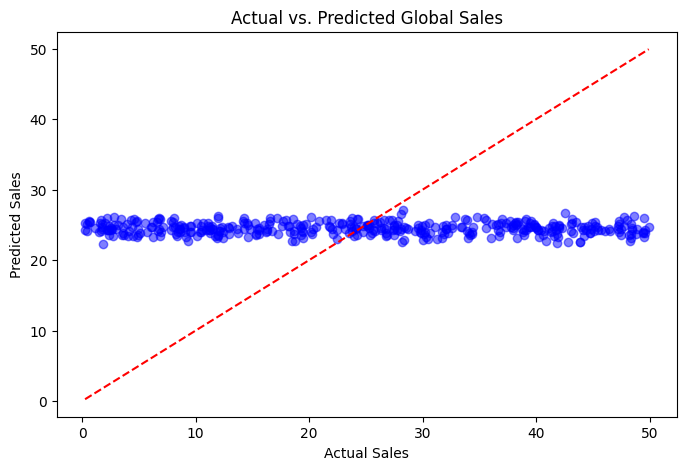

In [11]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs. Predicted Sales
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # 45-degree reference line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Global Sales")
plt.show()

